# Group 17

# Crash Data Report

###  Name of students:
Yuval Moshe Lishaor<br>
Ori Bachar<br>

# <div style="text-align: center; font-size: 24px; font-weight: bold; color: #800000;">Crash Data Report</div>


<img src="https://i.kinja-img.com/image/upload/c_fill,h_900,q_60,w_1600/479ff0950b32efe2417576d56243bf16.jpg" alt="Description of image" style="width: 100%; height: auto;">


In [134]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px #(שימוש למפה בלבד)


<b id="Top"> </b>  

1. [Interesting information for understanding the file](#1)
2. [Insight number one](#2)
3. [Insight number two](#3)
4. [Insight number three](#4)


In [138]:
url = "https://raw.githubusercontent.com/oribachar13579/oriandyuval/main/1.08_Crash_Data_Report_(detail).csv"
strike_df = pd.read_csv(url)
strike_df.head()

,X,Y,OBJECTID,Incidentid,DateTime,Year,StreetName,CrossStreet,Distance,JunctionRelation,...,Unittype_Two,Age_Drv2,Gender_Drv2,Traveldirection_Two,Unitaction_Two,Violation1_Drv2,AlcoholUse_Drv2,DrugUse_Drv2,Latitude,Longitude
0,-111.95221,33.42191,1,2598369,2012/01/01 07:25:00+00,2012,University Dr,Hardy Dr,0.000,Intersection Non Interchange,...,Driver,20.0,Female,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.42191,-111.95221
1,-111.93769,33.42319,2,2593420,2012/01/01 11:45:00+00,2012,7th St,Myrtle Ave,139.920,Not Junction Related,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.42319,-111.93769
2,-111.89196,33.41842,3,2588493,2012/01/01 18:07:00+00,2012,Price Rd,Orange St,0.000,Intersection Interchange,...,Driver,31.0,Male,South,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.41842,-111.89196
3,-111.94791,33.41779,4,2584449,2012/01/02 00:03:00+00,2012,11th St,Judd St,200.112,Not Junction Related,...,Driverless,NaN,NaN,East,Properly Parked,NaN,NaN,NaN,33.41779,-111.94791
4,-111.92847,33.34956,5,2592211,2012/01/02 00:12:00+00,2012,Rural Rd,Elliot Rd,135.168,Intersection Related Non Interchange,...,Driver,20.0,Female,South,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.34956,-111.92847


In [139]:
strike_df.shape

(51407, 35)

In [140]:
strike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51407 entries, 0 to 51406
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   X                    51081 non-null  float64
 1   Y                    51081 non-null  float64
 2   OBJECTID             51407 non-null  int64  
 3   Incidentid           51407 non-null  int64  
 4   DateTime             51407 non-null  object 
 5   Year                 51407 non-null  int64  
 6   StreetName           51201 non-null  object 
 7   CrossStreet          50744 non-null  object 
 8   Distance             51406 non-null  float64
 9   JunctionRelation     51406 non-null  object 
 10  Totalinjuries        51406 non-null  float64
 11  Totalfatalities      51406 non-null  float64
 12  Injuryseverity       51406 non-null  object 
 13  Collisionmanner      51406 non-null  object 
 14  Lightcondition       51406 non-null  object 
 15  Weather              51406 non-null 

In [141]:
strike_df.columns

Index(['X', 'Y', 'OBJECTID', 'Incidentid', 'DateTime', 'Year', 'StreetName',
       'CrossStreet', 'Distance', 'JunctionRelation', 'Totalinjuries',
       'Totalfatalities', 'Injuryseverity', 'Collisionmanner',
       'Lightcondition', 'Weather', 'SurfaceCondition', 'Unittype_One',
       'Age_Drv1', 'Gender_Drv1', 'Traveldirection_One', 'Unitaction_One',
       'Violation1_Drv1', 'AlcoholUse_Drv1', 'DrugUse_Drv1', 'Unittype_Two',
       'Age_Drv2', 'Gender_Drv2', 'Traveldirection_Two', 'Unitaction_Two',
       'Violation1_Drv2', 'AlcoholUse_Drv2', 'DrugUse_Drv2', 'Latitude',
       'Longitude'],
      dtype='object')

In [142]:
#החלפנו את שם העמודה לשם יותר ברור להבנה-מתאר מספור מהתאונה הראשונה עד האחרונה בקובץ זה
strike_df.rename(columns={'OBJECTID': 'NumOfAccident'}, inplace=True)

#החלפנו את איקס לקאורדינטת איקס על מנת שמיקום במפה ייראה ברור יותר, כנל ל וואי 
strike_df.rename(columns={'X': 'Coordinate_X'}, inplace=True)
strike_df.rename(columns={'Y': 'Coordinate_Y'}, inplace=True)

#הסרת שתי העמודות האחרונות כיוון שזה כמו שתי העמודות הראשונות
strike_df = strike_df.iloc[:, :-2]

In [143]:
#מציאת ערכים חסרים בכל עמודה
strike_df.isnull().sum()

Coordinate_X            326
Coordinate_Y            326
NumOfAccident             0
Incidentid                0
DateTime                  0
Year                      0
StreetName              206
CrossStreet             663
Distance                  1
JunctionRelation          1
Totalinjuries             1
Totalfatalities           1
Injuryseverity            1
Collisionmanner           1
Lightcondition            1
Weather                   1
SurfaceCondition          1
Unittype_One              1
Age_Drv1                 48
Gender_Drv1             954
Traveldirection_One       1
Unitaction_One            1
Violation1_Drv1          48
AlcoholUse_Drv1          48
DrugUse_Drv1             48
Unittype_Two           3387
Age_Drv2               4753
Gender_Drv2            4855
Traveldirection_Two    3387
Unitaction_Two         3387
Violation1_Drv2        4753
AlcoholUse_Drv2        4753
DrugUse_Drv2           4753
dtype: int64

In [144]:
len(strike_df)

51407

In [145]:
strike_df["Year"].unique()


array([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,
       2023, 2024], dtype=int64)

In [146]:
strike_df.tail()

,Coordinate_X,Coordinate_Y,NumOfAccident,Incidentid,DateTime,Year,StreetName,CrossStreet,Distance,JunctionRelation,...,AlcoholUse_Drv1,DrugUse_Drv1,Unittype_Two,Age_Drv2,Gender_Drv2,Traveldirection_Two,Unitaction_Two,Violation1_Drv2,AlcoholUse_Drv2,DrugUse_Drv2
51402,-111.926385,33.435558,51403,4155884,2024/03/14 13:15:00+00,2024,SR-202 Exit 7 T-Ramp,NaN,0.0,Not Junction Related,...,No Apparent Influence,No Apparent Influence,Driver,22.0,Female,East,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence
51403,-111.926404,33.435576,51404,4155885,2024/03/14 13:20:00+00,2024,SR-202 Exit 7 T-Ramp,NaN,0.0,Entrance Exit Ramp 205,...,No Apparent Influence,No Apparent Influence,Driver,25.0,Female,West,Making Right Turn,No Improper Action,No Apparent Influence,No Apparent Influence
51404,-111.909869,33.436621,51405,4155890,2024/03/15 07:11:00+00,2024,SR-202 Exit 8 J-Ramp,NaN,0.0,Entrance Exit Ramp 205,...,No Apparent Influence,No Apparent Influence,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51405,-111.939524,33.386046,51406,4155893,2024/03/09 07:44:00+00,2024,US-60 Exit 173 J-Ramp,NaN,0.0,Entrance Exit Ramp 205,...,Alcohol,No Apparent Influence,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51406,-111.968688,33.405953,51407,4156010,2024/03/08 19:59:00+00,2024,I-10 Exit 153 C2-Ramp,NaN,0.0,Not Junction Related,...,No Apparent Influence,No Apparent Influence,Driver,58.0,Male,West,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence


# <b id="section_1">  </b> <b style='color:#F05454'>1.  Interesting information for understanding the file </b> <b></b> 

* **We created a correlation table in order to help us distinguish whether there is a relationship between certain columns.**

[Text(0.5, 1.0, 'Correlation Matrix')]

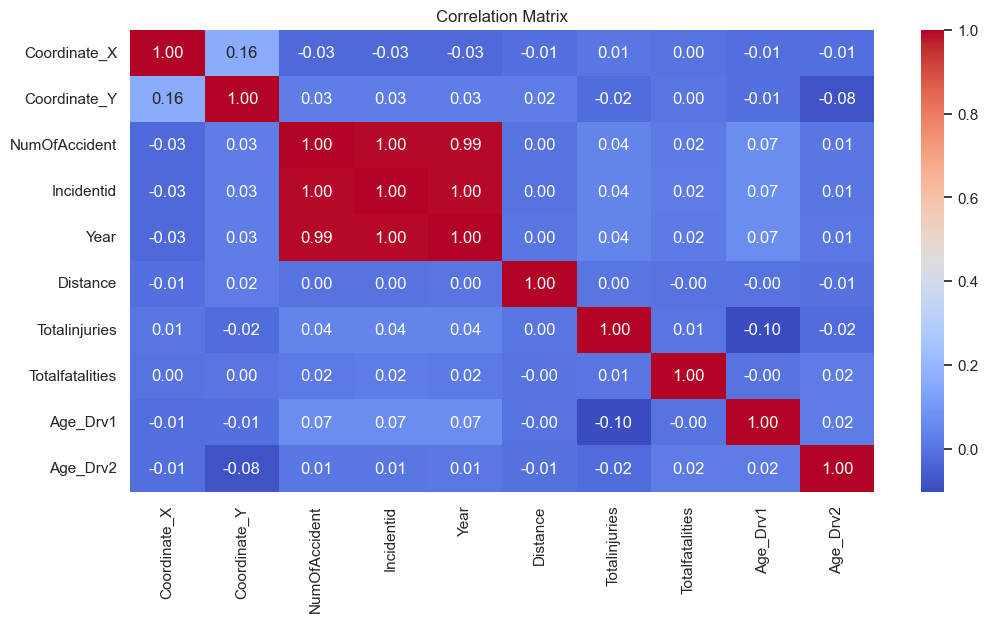

In [147]:
# בחירת העמודות המספריות בלבד
numeric_df = strike_df.select_dtypes(include=['float64', 'int64'])

# חישוב מטריצת הקורלציה
corr_matrix = numeric_df.corr()

# יצירת גרף חום של מטריצת הקורלציה באמצעות Seaborn בלבד
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f").set(title='Correlation Matrix')


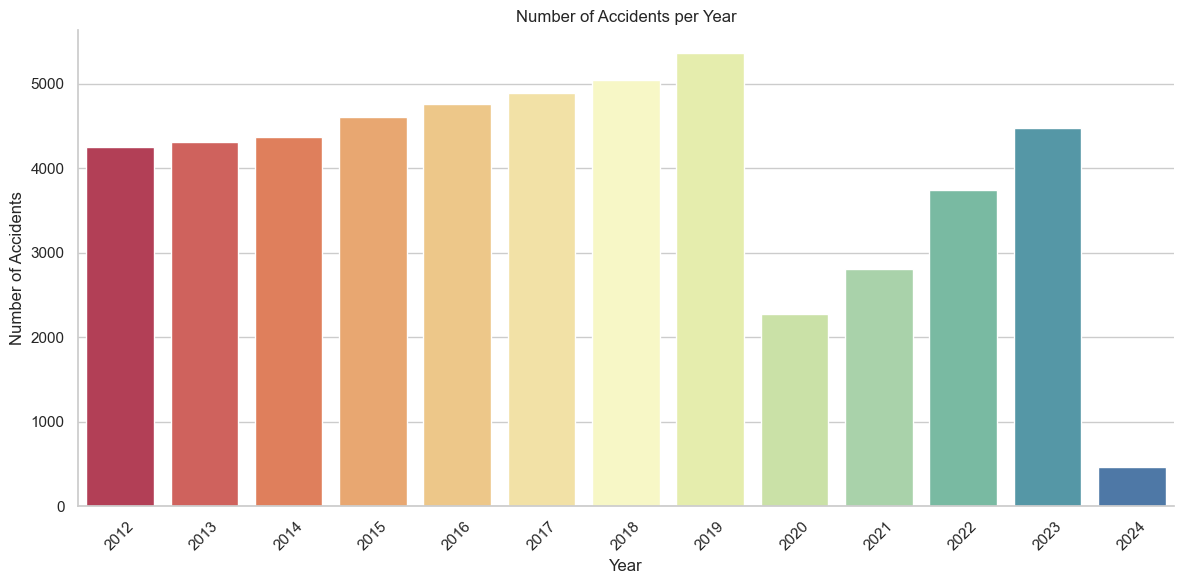

In [148]:
# יצירת נתוני תאונות לפי שנה
accidents_by_year = strike_df['Year'].value_counts().sort_index()

# יצירת DataFrame מתוך הנתונים
accidents_by_year_df = accidents_by_year.reset_index()
accidents_by_year_df.columns = ['Year', 'Number of Accidents']

# יצירת פלטת צבעים מותאמת אישית(בעזרת צאט גי טי פי)
custom_palette = sns.color_palette("Spectral", len(accidents_by_year_df))

# יצירת גרף ברפלוט 
sns.set(style="whitegrid")
bar_plot = sns.barplot(x='Year', y='Number of Accidents', data=accidents_by_year_df, palette=custom_palette)
bar_plot.set_title('Number of Accidents per Year')
bar_plot.set_xlabel('Year')
bar_plot.set_ylabel('Number of Accidents')
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45)
sns.despine()

# שמירת הגרף
bar_plot.figure.tight_layout()
bar_plot.figure.savefig('accidents_per_year.png')


* **ניתן לראות את כמות התאונות שהתרחשו בכל שנה ושנה**

In [149]:
med_df= strike_df.groupby('Year')['NumOfAccident'].count()
med_df

Year
2012    4258
2013    4316
2014    4372
2015    4612
2016    4768
2017    4896
2018    5049
2019    5366
2020    2280
2021    2805
2022    3745
2023    4480
2024     460
Name: NumOfAccident, dtype: int64

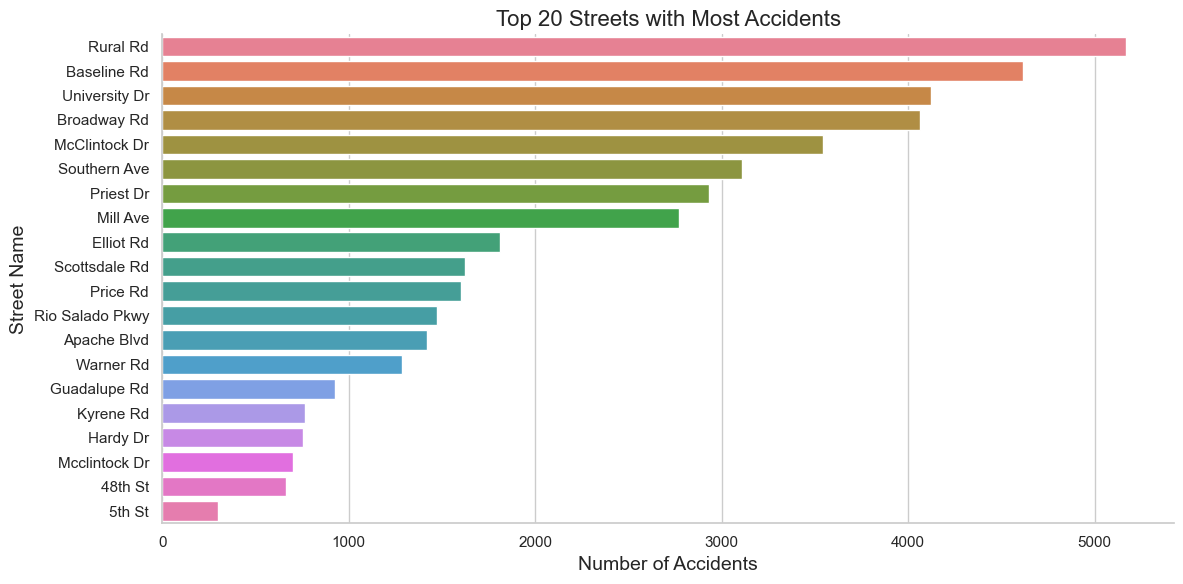

In [150]:
# חישוב מספר התאונות לכל רחוב
accidents_by_street = strike_df['StreetName'].value_counts().reset_index()
accidents_by_street.columns = ['StreetName', 'Number of Accidents']

# מציגים רק את 20 הרחובות עם מספר התאונות הגבוה ביותר
top_streets = accidents_by_street.head(20)

# יצירת גרף עמודות
sns.set(style="whitegrid")
bar_plot = sns.barplot(data=top_streets, x='Number of Accidents', y='StreetName', palette='husl', dodge=False)
bar_plot.set_title('Top 20 Streets with Most Accidents', fontsize=16)
bar_plot.set_xlabel('Number of Accidents', fontsize=14)
bar_plot.set_ylabel('Street Name', fontsize=14)
sns.despine()

# שמירת הגרף(נעזרנו בצאט גי טי פי)
fig = bar_plot.get_figure()
fig.tight_layout()
fig.savefig('top_streets_accidents.png')

In [151]:
total_accidents = top_streets['Number of Accidents'].sum()
print("Total number of accidents:", total_accidents)


Total number of accidents: 43654


In [152]:
#מתאר לנו כמה רחובות שונים יש בכל הקובץ
num_streets = len(accidents_by_street['StreetName'].unique())
print(num_streets)


522


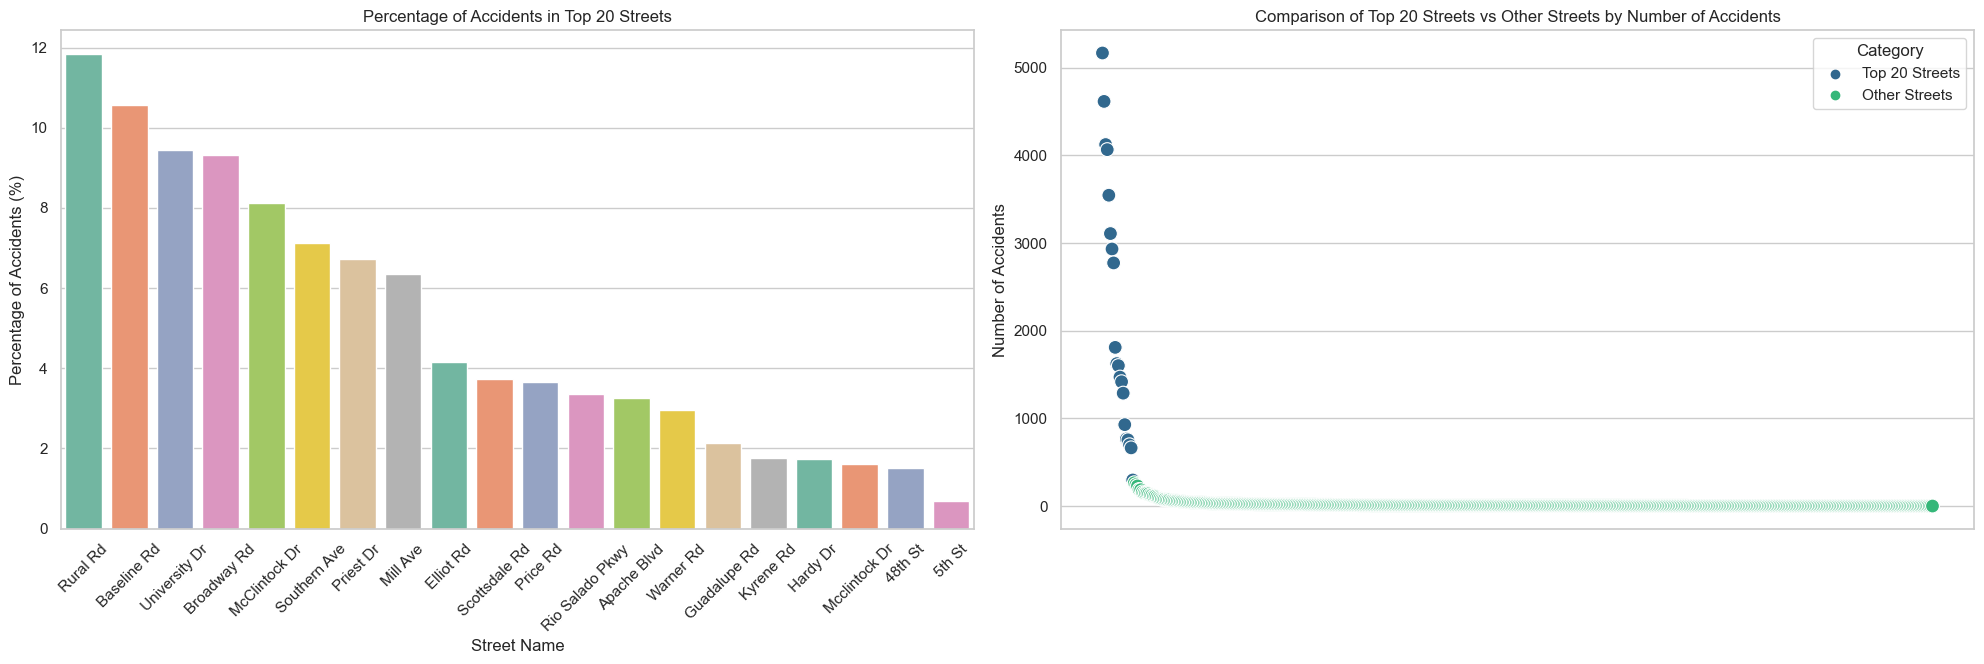

In [153]:
plt.figure(figsize=(20, 8))

# גרף העמודות
plt.subplot(1, 2, 1)
sns.barplot(data=top_streets_with_percentage, x='StreetName', y='Percentage', palette='Set2')
plt.title('Percentage of Accidents in Top 20 Streets')
plt.xlabel('Street Name')
plt.ylabel('Percentage of Accidents (%)')
plt.xticks(rotation=45)

# גרף הפיזור
plt.subplot(1, 2, 2)
sns.scatterplot(data=combined_streets, x='StreetName', y='Number of Accidents', hue='Category', palette='viridis', s=100)
plt.xlabel('Street Name')
plt.ylabel('Number of Accidents')
plt.title('Comparison of Top 20 Streets vs Other Streets by Number of Accidents')
plt.xticks(rotation=90)
plt.legend(title='Category', loc='upper right')
plt.tight_layout()

# הסרת שמות הרחובות מציר ה-X בגרף השני
plt.gca().axes.get_xaxis().set_visible(False)

# הצגת הגרפים
plt.show()


In [154]:
accidents_per_street = strike_df['StreetName'].value_counts()
print(accidents_per_street)


StreetName
Rural Rd                5167
Baseline Rd             4615
University Dr           4123
Broadway Rd             4065
McClintock Dr           3545
                        ... 
Indian Bend Front          1
Innovation Cir             1
Amanda Ln                  1
Stratton Ln                1
SR-143 Exit 1 C-Ramp       1
Name: count, Length: 522, dtype: int64


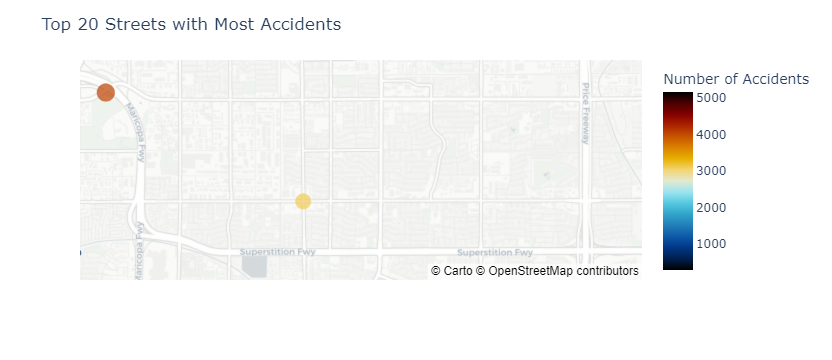

In [130]:
top_streets = accidents_by_street.head(20)

# מאחדים את הנתונים עם קואורדינטות X ו-Y
top_streets_coords = top_streets.merge(strike_df[['StreetName', 'Coordinate_X', 'Coordinate_Y']], on='StreetName', how='left').drop_duplicates(subset=['StreetName'])

# יוצרים מפה אינטראקטיבית
fig = px.scatter_mapbox(
    top_streets_coords,
    lat='Coordinate_Y',
    lon='Coordinate_X',
    hover_name='StreetName',
    hover_data={'Number of Accidents': True, 'Coordinate_X': False, 'Coordinate_Y': False},
    color='Number of Accidents',
    color_continuous_scale=px.colors.cyclical.IceFire,
    size='Number of Accidents',
    size_max=15,
    zoom=12,
    mapbox_style='carto-positron'
)

# מציגים את המפה
fig.update_layout(title='Top 20 Streets with Most Accidents')
fig.show()

# <b id="section_2">  </b> <b style='color:#F05454'>2.  Insight number one </b> <b></b> 

* **We proved Pareto: it can be seen by the barplot graph, scatterplot and by using the map, that there are the main streets in the city where the highest number of accidents occur, as described before. In addition, it can be seen that the 20 streets where the most accidents happened They actually make up about 80% of all the 522 existing streets, so it can be said that these streets require more attention.
We hypothesize that this can be overcome through enforcement by the security forces in the area so that accidents there are avoided**

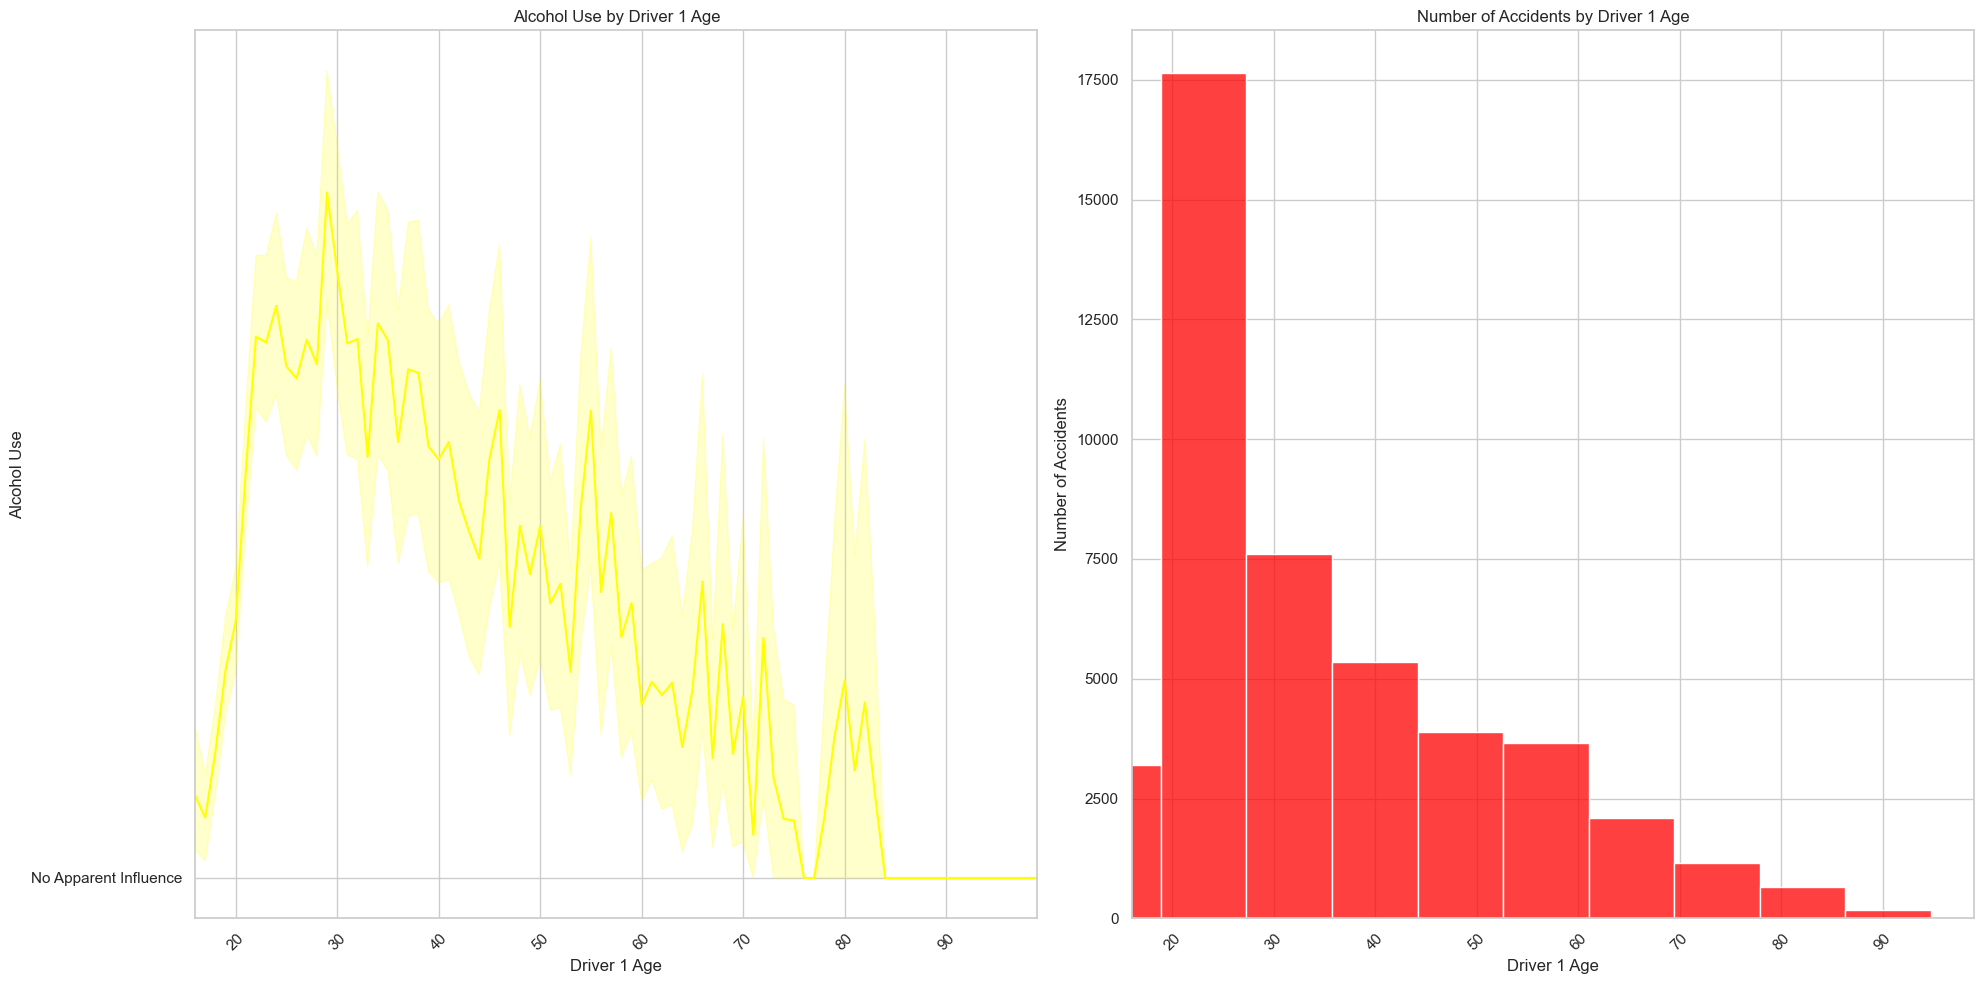

In [131]:
plt.figure(figsize=(20, 10))

# גרף השימוש באלכוהול לפי גיל הנהג
plt.subplot(1, 2, 1)
sns.lineplot(x='Age_Drv1', y='AlcoholUse_Drv1', data=strike_df, color='yellow')
plt.xlabel('Driver 1 Age')
plt.ylabel('Alcohol Use')
plt.title('Alcohol Use by Driver 1 Age')
plt.xticks(rotation=45)
plt.xlim(16, 99)

# גרף מספר התאונות לפי גיל הנהג
plt.subplot(1, 2, 2)
sns.histplot(x='Age_Drv1', data=strike_df, bins=30, color='red')
plt.xlabel('Driver 1 Age')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Driver 1 Age')
plt.xticks(rotation=45)
plt.xlim(16, 99)

plt.tight_layout()
plt.show()


# <b id="section_3">  </b> <b style='color:#F05454'>3.  Insight number two </b> <b></b> 

* **Analyzing the graphs of alcohol use according to the age of the first driver shows that young drivers (aged 18-30) tend to use alcohol more than older drivers. It can also be seen that older drivers (50+) use less alcohol compared to younger drivers. This conclusion indicates that there is a need for education and increased enforcement of drunk driving among young populations in order to reduce the number of accidents caused by the use of alcohol**

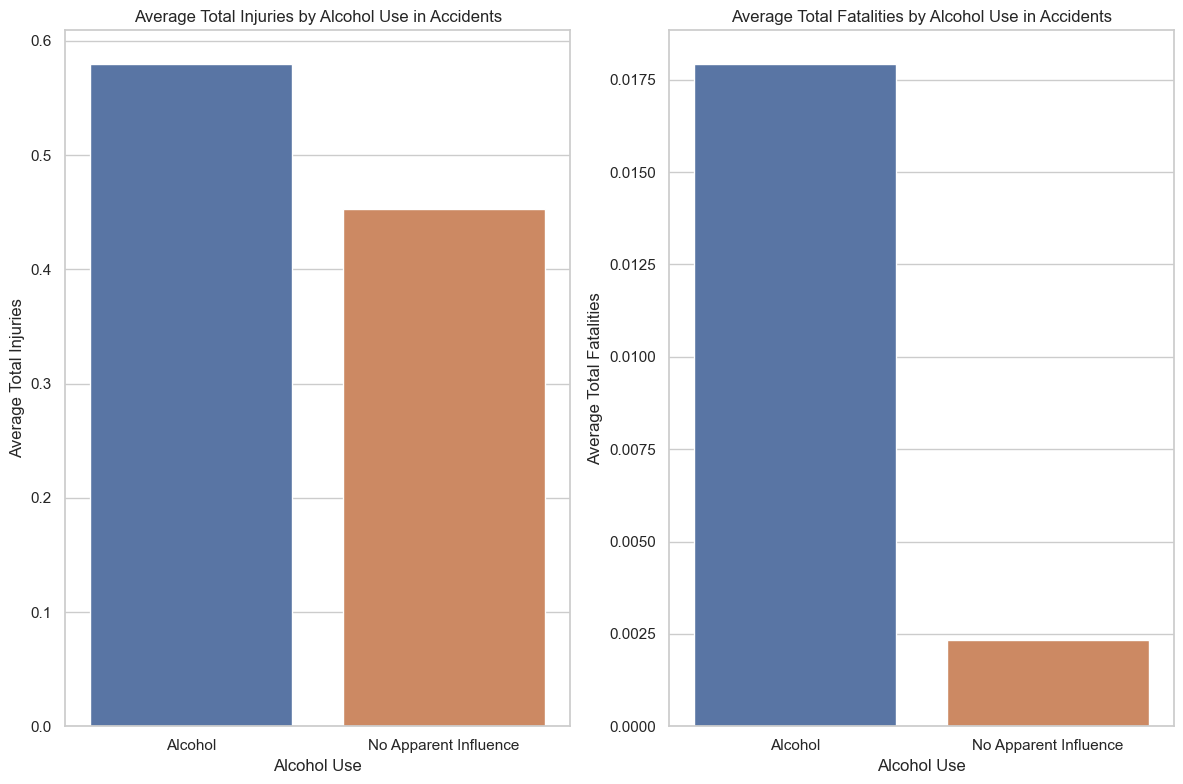

In [132]:
fig, axs = plt.subplots(1, 2, figsize=(12, 8))

# גרף ראשון - כמות פצועים לפי צריכת אלכוהול
sns.barplot(x='AlcoholUse_Drv1', y='Totalinjuries', data=strike_df, ax=axs[0], errorbar=None)
axs[0].set_xlabel('Alcohol Use')
axs[0].set_ylabel('Average Total Injuries')
axs[0].set_title('Average Total Injuries by Alcohol Use in Accidents')

# גרף שני - כמות מתים לפי צריכת אלכוהול
sns.barplot(x='AlcoholUse_Drv1', y='Totalfatalities', data=strike_df, ax=axs[1], errorbar=None)
axs[1].set_xlabel('Alcohol Use')
axs[1].set_ylabel('Average Total Fatalities')
axs[1].set_title('Average Total Fatalities by Alcohol Use in Accidents')

plt.tight_layout()
plt.show()


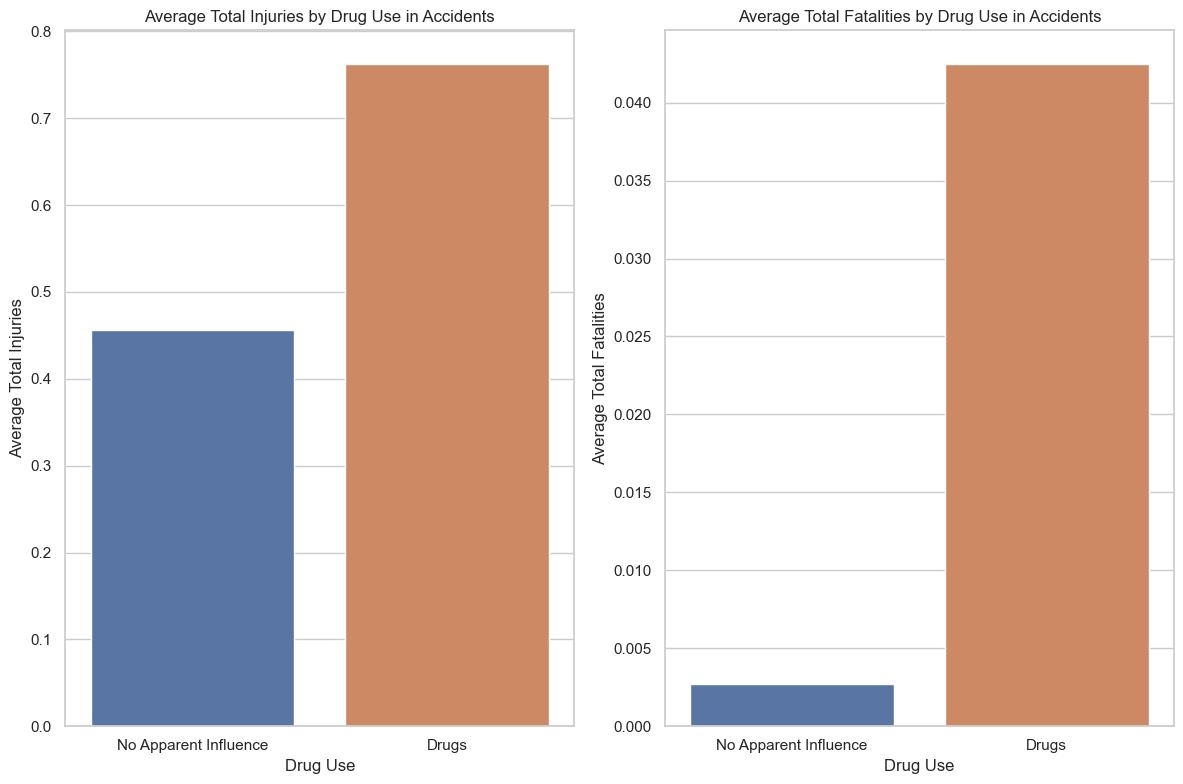

In [133]:
fig, axs = plt.subplots(1, 2, figsize=(12, 8))

# גרף ראשון - כמות פצועים לפי צריכת אלכוהול
sns.barplot(x='DrugUse_Drv1', y='Totalinjuries', data=strike_df, ax=axs[0], errorbar=None)
axs[0].set_xlabel('Drug Use')
axs[0].set_ylabel('Average Total Injuries')
axs[0].set_title('Average Total Injuries by Drug Use in Accidents')

# גרף שני - כמות מתים לפי צריכת אלכוהול
sns.barplot(x='DrugUse_Drv1', y='Totalfatalities', data=strike_df, ax=axs[1], errorbar=None)
axs[1].set_xlabel('Drug Use')
axs[1].set_ylabel('Average Total Fatalities')
axs[1].set_title('Average Total Fatalities by Drug Use in Accidents')

plt.tight_layout()
plt.show()


# <b id="section_4">  </b> <b style='color:#F05454'>3.  Insight number three: </b> <b></b> 

* **It can be seen that when you consume alcohol\drugs and drive, then the number of people killed is much more than the number of people killed who did not drink alcohol.**

In [23]:
# Convert 'DateTime' column to datetime type
strike_df['DateTime'] = pd.to_datetime(strike_df['DateTime'])

# Extract month from DateTime column
strike_df['Month'] = strike_df['DateTime'].dt.month

# Map month to season
season_map = {11: 'Winter', 12: 'Winter', 1: 'Winter',
              2: 'Winter', 3: 'Spring', 4: 'Spring',
              5: 'Summer', 6: 'Summer', 7: 'Summer',
              8: 'Summer', 9: 'Fall', 10: 'Fall'}
strike_df['Season'] = strike_df['Month'].map(season_map)

strike_df.head()


,Coordinate_X,Coordinate_Y,NumOfAccident,Incidentid,DateTime,Year,StreetName,CrossStreet,Distance,JunctionRelation,...,Unittype_Two,Age_Drv2,Gender_Drv2,Traveldirection_Two,Unitaction_Two,Violation1_Drv2,AlcoholUse_Drv2,DrugUse_Drv2,Month,Season
0,-111.95221,33.42191,1,2598369,2012-01-01 07:25:00+00:00,2012,University Dr,Hardy Dr,0.000,Intersection Non Interchange,...,Driver,20.0,Female,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,1,Winter
1,-111.93769,33.42319,2,2593420,2012-01-01 11:45:00+00:00,2012,7th St,Myrtle Ave,139.920,Not Junction Related,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Winter
2,-111.89196,33.41842,3,2588493,2012-01-01 18:07:00+00:00,2012,Price Rd,Orange St,0.000,Intersection Interchange,...,Driver,31.0,Male,South,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,1,Winter
3,-111.94791,33.41779,4,2584449,2012-01-02 00:03:00+00:00,2012,11th St,Judd St,200.112,Not Junction Related,...,Driverless,NaN,NaN,East,Properly Parked,NaN,NaN,NaN,1,Winter
4,-111.92847,33.34956,5,2592211,2012-01-02 00:12:00+00:00,2012,Rural Rd,Elliot Rd,135.168,Intersection Related Non Interchange,...,Driver,20.0,Female,South,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,1,Winter


In [24]:
print(strike_df['Season'])


0        Winter
1        Winter
2        Winter
3        Winter
4        Winter
          ...  
51402    Spring
51403    Spring
51404    Spring
51405    Spring
51406    Spring
Name: Season, Length: 51407, dtype: object


In [25]:
season_accidents = strike_df.groupby('Season')['NumOfAccident'].count().reset_index()
print(season_accidents)


   Season  NumOfAccident
0    Fall           9404
1  Spring           8928
2  Summer          14983
3  Winter          18092


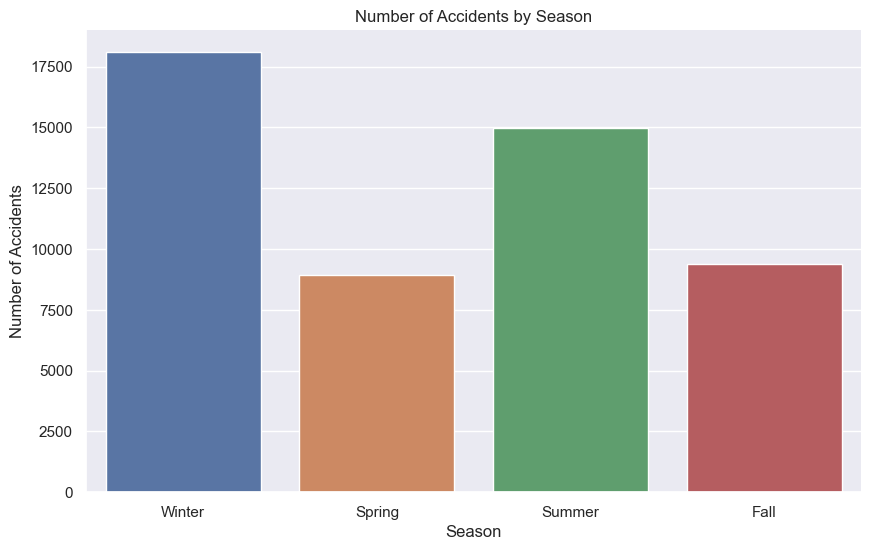

In [26]:
sns.set(rc={'figure.figsize':(10, 6)})
bar_plot = sns.barplot(x='Season', y='NumOfAccident', data=season_accidents, order=['Winter', 'Spring', 'Summer', 'Fall'])
bar_plot.set_xlabel('Season')
bar_plot.set_ylabel('Number of Accidents')
bar_plot.set_title('Number of Accidents by Season')
sns.despine()


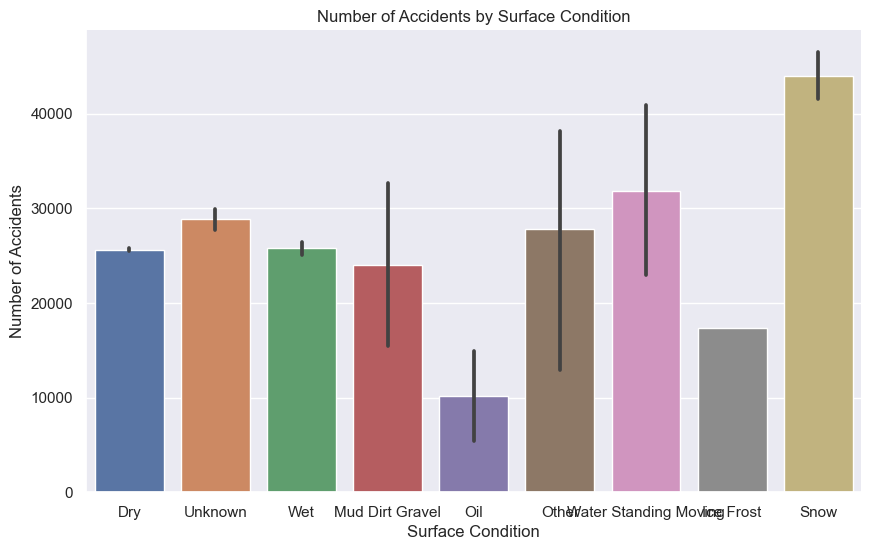

In [27]:
sns.set(rc={'figure.figsize':(10, 6)})
bar_plot = sns.barplot(x='SurfaceCondition', y='NumOfAccident', data=strike_df)
bar_plot.set_xlabel('Surface Condition')
bar_plot.set_ylabel('Number of Accidents')
bar_plot.set_title('Number of Accidents by Surface Condition')
sns.despine()


In [158]:
sns.set(rc={'figure.figsize':(12, 6)})
count_plot = sns.countplot(x='Season', hue='SurfaceCondition', data=strike_df, order=['Winter', 'Spring', 'Summer', 'Fall'])
count_plot.set_xlabel('Season')
count_plot.set_ylabel('Count')


ValueError: Could not interpret input 'Season'

AttributeError: module 'seaborn' has no attribute 'set_xlabel'

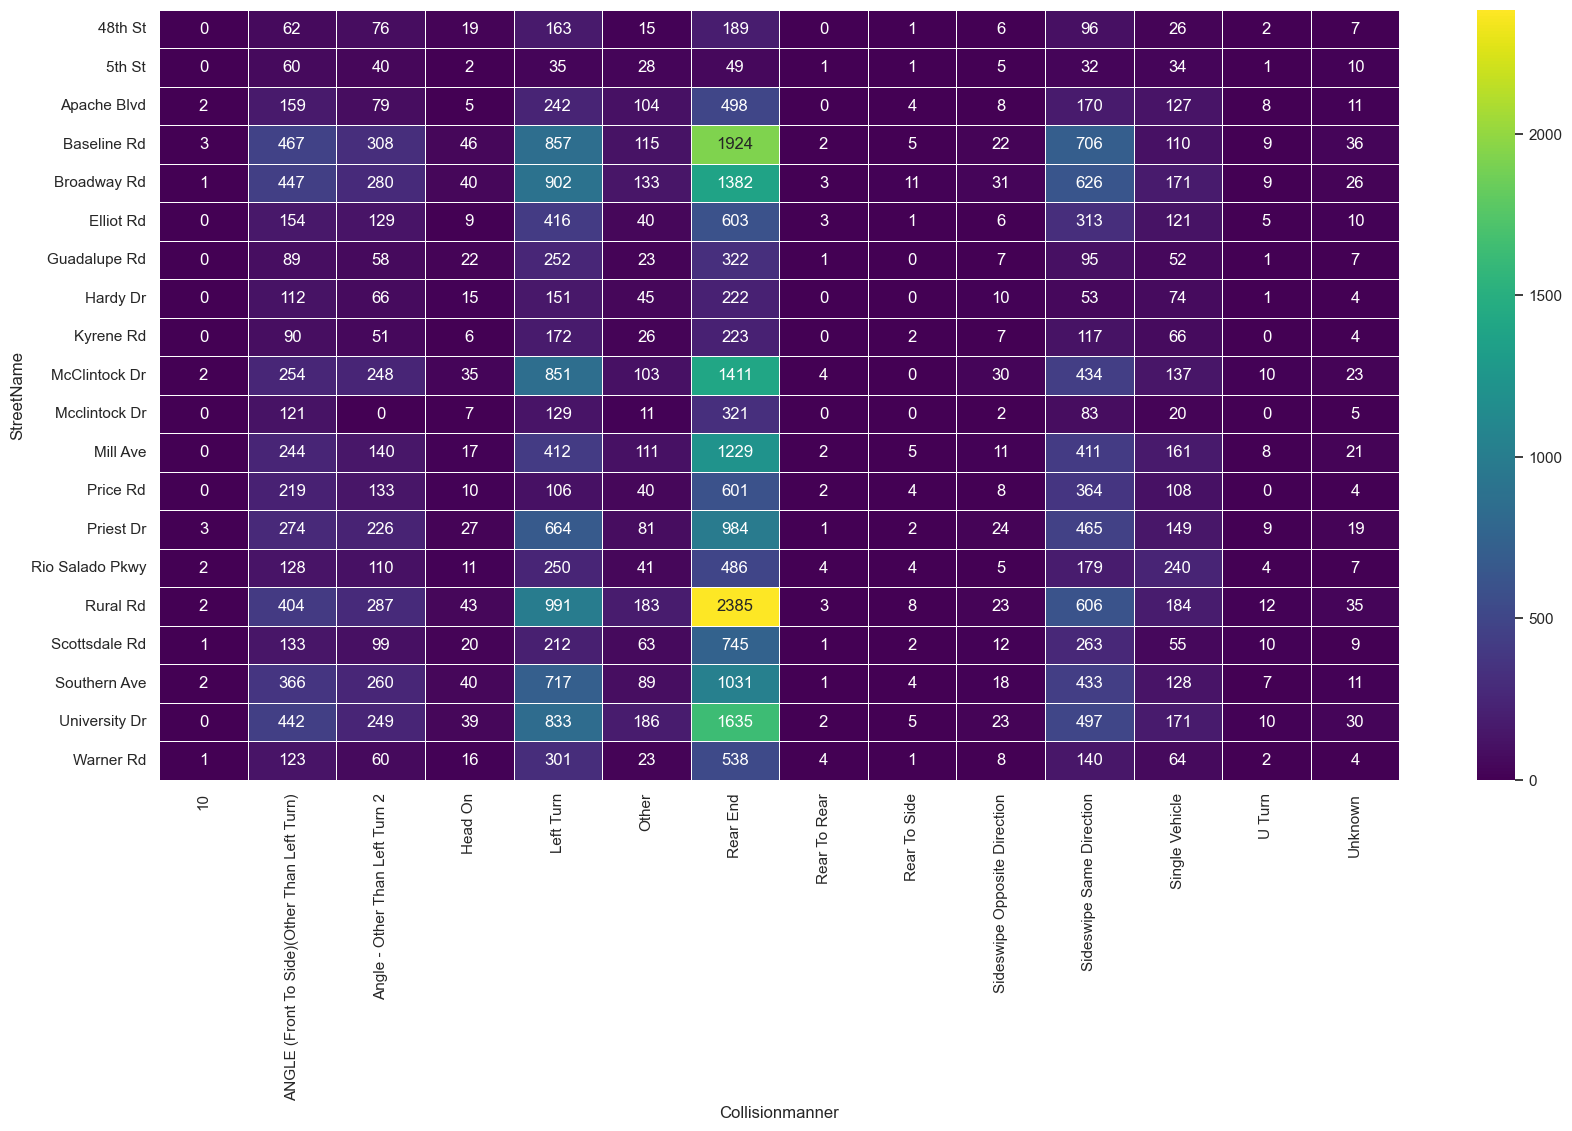

In [39]:
top_streets = strike_df['StreetName'].value_counts().head(20).index.tolist()
df_top_streets = strike_df[strike_df['StreetName'].isin(top_streets)]

# יצירת טבלת ציר (pivot table) עם מספר ההתנגשויות לפי רחוב וסוג התנגשות
pivot_table = df_top_streets.pivot_table(index='StreetName', columns='Collisionmanner', aggfunc='size', fill_value=0)

# יצירת גרף  (heatmap)
sns.set(rc={'figure.figsize':(20, 10)})
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="viridis", linewidths=.5)
sns.set_xlabel('Collision Manner')
sns.set_ylabel('Street Name')
sns.set_title('Number of Collisions by Street and Collision Manner')
sns.set_xticklabels(rotation=45)
sns.set_yticklabels(rotation=0)
sns.set_tight_layout()
sns.show()


AttributeError: module 'seaborn' has no attribute 'xlabel'

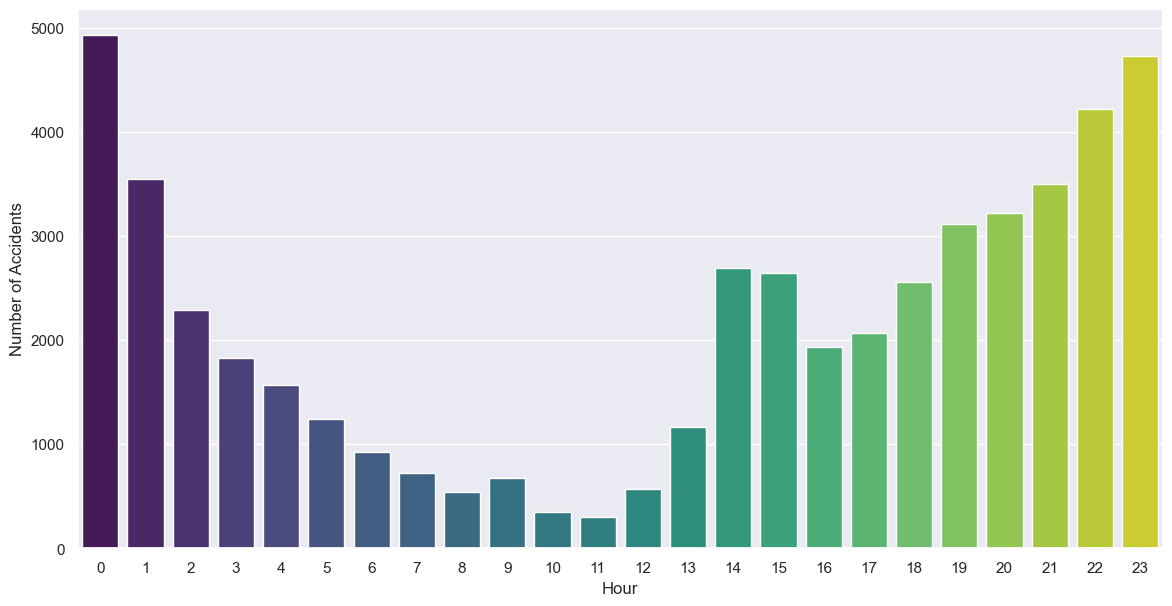

In [41]:
# הנחה שעמודת DateTime היא מסוג תאריך ושעה
strike_df['Hour'] = pd.to_datetime(strike_df['DateTime']).dt.hour

# ספירת מספר התאונות בכל שעה
accidents_by_hour = strike_df['Hour'].value_counts().reset_index()
accidents_by_hour.columns = ['Hour', 'Number of Accidents']
accidents_by_hour = accidents_by_hour.sort_values(by='Hour')

# יצירת גרף עמודות
sns.set(rc={'figure.figsize':(14, 7)})
sns.barplot(x='Hour', y='Number of Accidents', data=accidents_by_hour, palette='viridis')
sns.xlabel('Hour of the Day')
sns.ylabel('Number of Accidents')
sns.title('Number of Accidents by Hour of the Day')
plt.xticks(rotation=45)
sns.set_tight_layout()
sns.show()
